In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,True,19,15,39
1,True,21,15,81
2,False,20,16,6
3,False,23,16,77
4,False,31,17,40


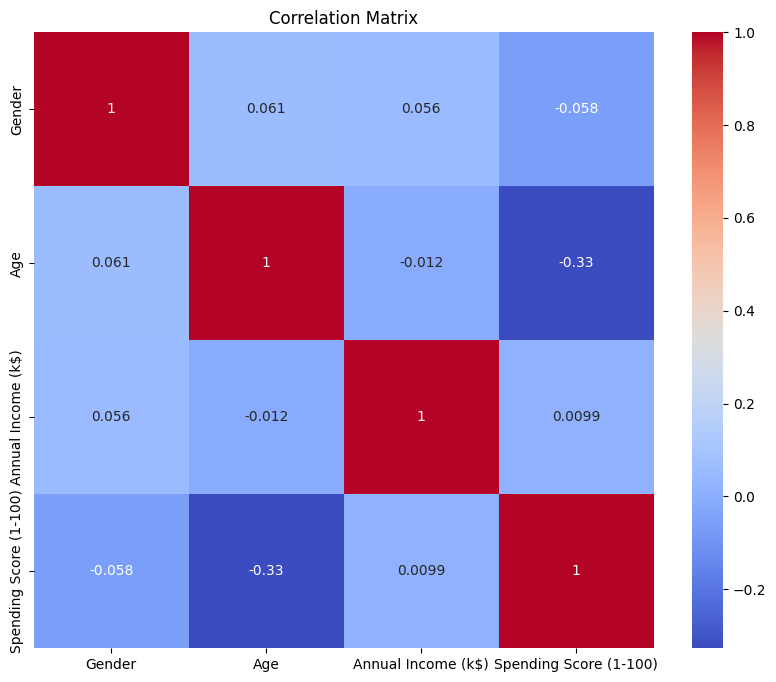

In [5]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
df.drop(['Gender','Age'],axis=1,inplace=True)
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
df.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [8]:
df.columns = ['Income','Spend']
df.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


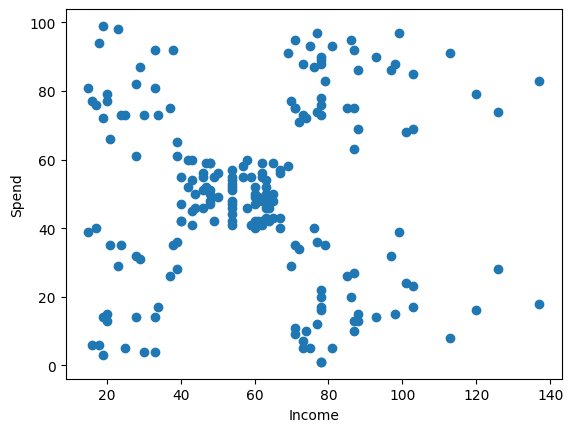

In [9]:
# plot data
plt.scatter(df['Income'],df['Spend'])
plt.xlabel('Income')
plt.ylabel('Spend')
plt.show()

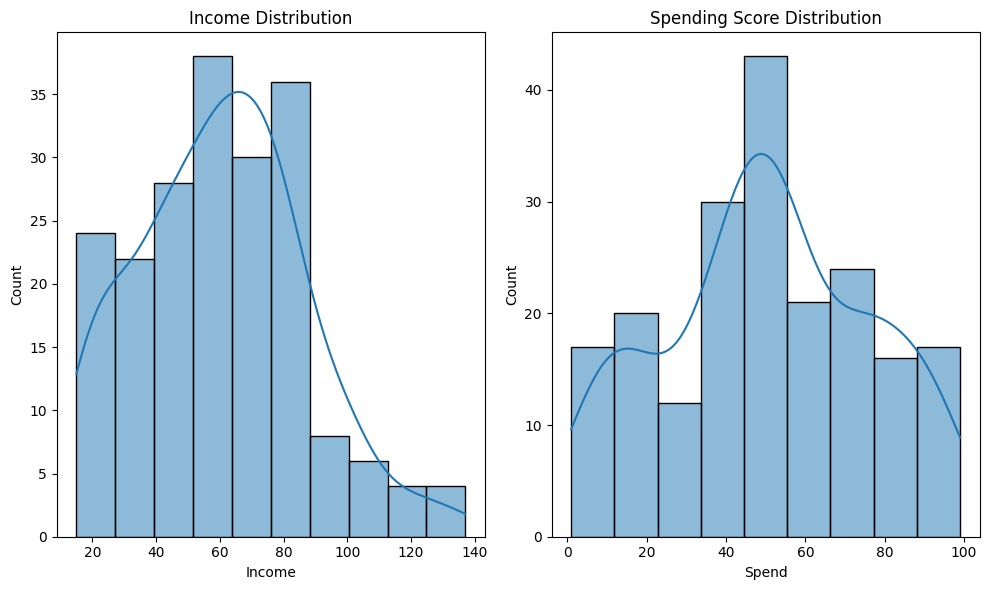

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Spend'], kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=9,min_samples=3)
dbscan.fit(df)
label = dbscan.labels_
len_label = len(set(label))-(1 if -1 in label else 0)

score = silhouette_score(df,label)
score

0.475053701963407

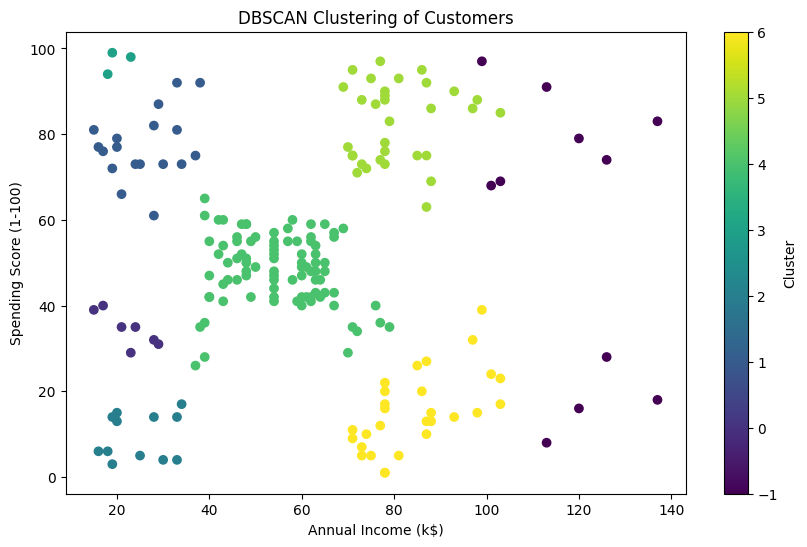

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Spend'], c=label, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering of Customers')
plt.colorbar(label='Cluster')
plt.show()

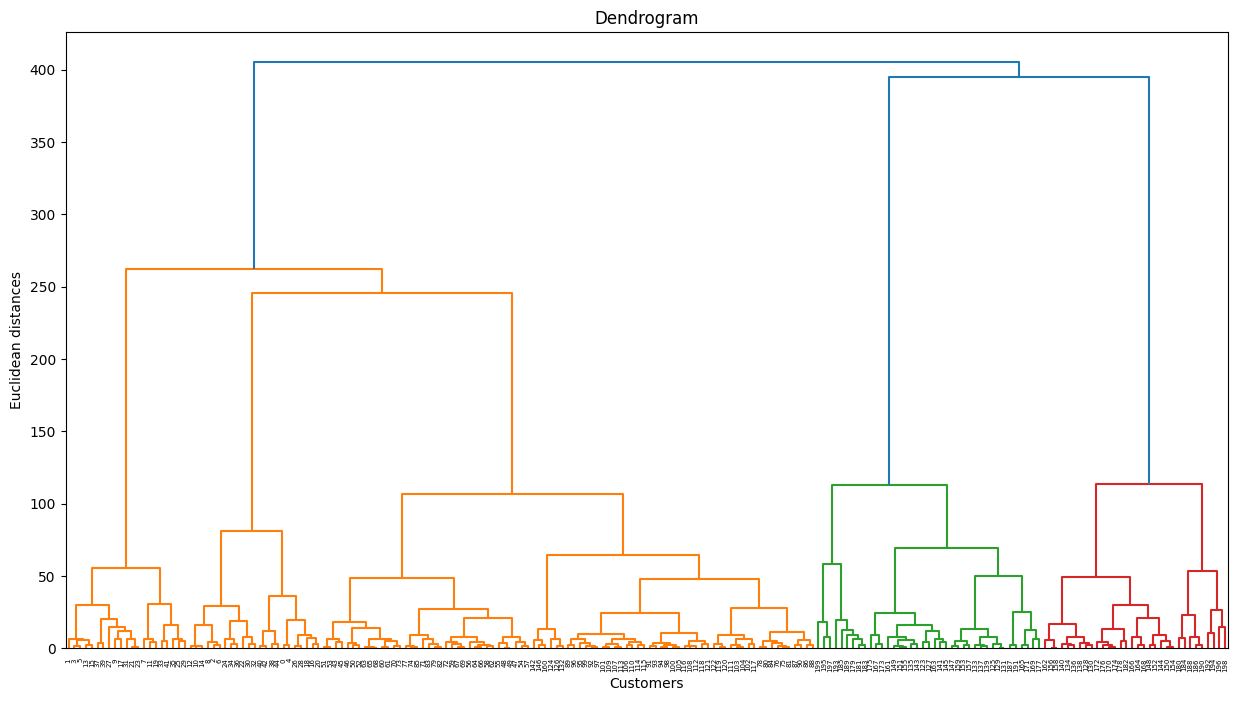

In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(df)

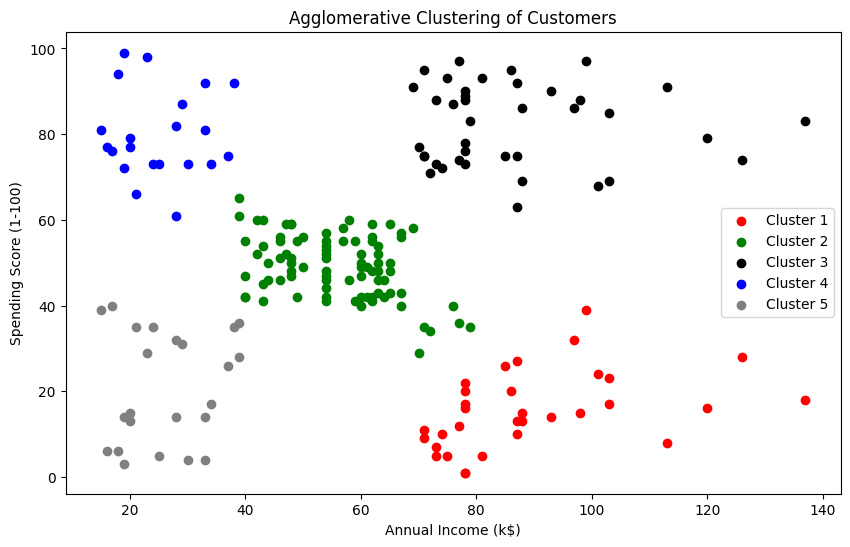

In [16]:
import matplotlib.pyplot as plt

# Assuming 'y_hc' contains the cluster labels from Agglomerative Clustering
# and 'df' contains your data with 'Income' and 'Spend' columns

plt.figure(figsize=(10, 6))

# Define a color map for the clusters
colors = ['red', 'green', 'black', 'blue', 'gray']

# Iterate through the clusters and plot the data points with the corresponding color
for i in range(5):
  plt.scatter(df['Income'][y_hc == i], df['Spend'][y_hc == i], c=colors[i], label=f'Cluster {i+1}')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering of Customers')
plt.legend()
plt.show()

In [17]:
score = silhouette_score(df,y_hc)
score

0.5529945955148897